In [2]:
import numpy as np
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
def extract_hog_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to desired dimensions
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(gray).flatten()
    return hog_features

In [4]:
# Path to your dataset directory
dataset_path = '/kaggle/input/solar-panel-images/Faulty_solar_panel'

# Example: Assuming you have images in subdirectories based on classes
# You need to iterate through the images and extract HOG features
data = []
labels = []

In [5]:
for class_folder in glob.glob(dataset_path + '/*'):
    class_name = class_folder.split('/')[-1]
    for img_path in glob.glob(class_folder + '/*.jpg'):
        features = extract_hog_features(img_path)
        data.append(features)
        labels.append(class_name)


In [6]:

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [8]:

# Initialize SVM classifier
svm_model = SVC(kernel='linear')


In [9]:
# Train the SVM classifier
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)


In [11]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [12]:
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 99.84%
Testing Accuracy: 58.13%


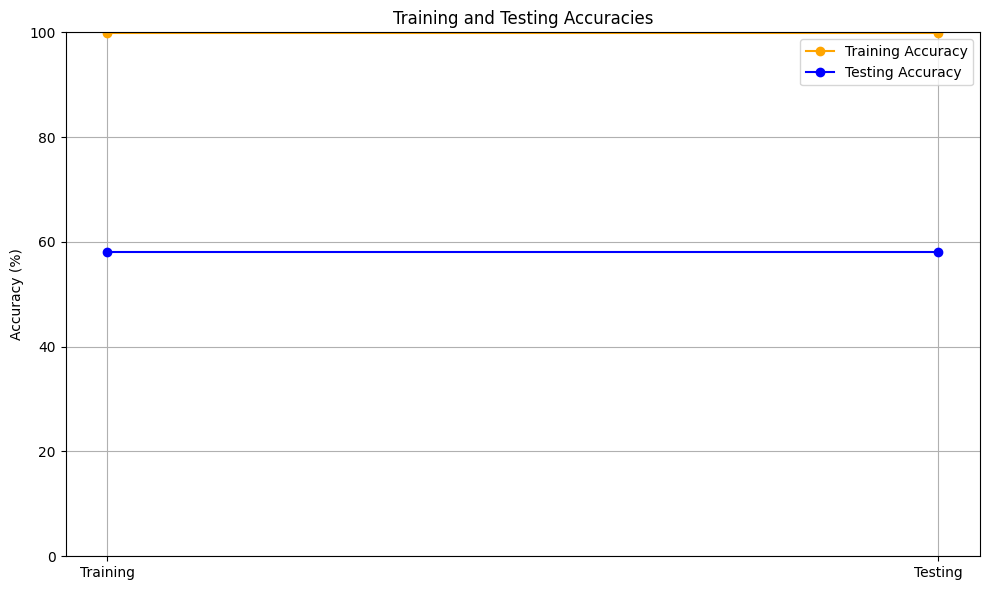

In [19]:
import matplotlib.pyplot as plt

# Actual accuracy values
train_accuracy = 99.84
test_accuracy = 58.13

# Define the epochs or categories
epochs = ['Training', 'Testing']

# Define the accuracy values
accuracy_values_train = [train_accuracy, train_accuracy]  # To plot a line at the training accuracy
accuracy_values_test = [test_accuracy, test_accuracy]     # To plot a line at the testing accuracy

# Plotting training and testing accuracies
plt.figure(figsize=(10, 6))

# Plot for Training Accuracy in Orange Color
plt.plot(epochs, accuracy_values_train, marker='o', linestyle='-', color='orange', label='Training Accuracy')

# Plot for Testing Accuracy in Blue Color
plt.plot(epochs, accuracy_values_test, marker='o', linestyle='-', color='blue', label='Testing Accuracy')

plt.ylim(0, 100)  # Set the y-axis limit to percentage values
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
